In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.binomial(1, 0.5)

1

In [3]:
x=np.random.binomial(20, 0.5,10000)#n,p,length
print((x>=15).mean())

0.0208


In [4]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

7

In [5]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

96 tornadoes back to back in 2739.72602739726 years


In [6]:
np.random.uniform(0, 1)

0.5554505538748641

In [7]:
np.random.normal(0.75)

0.5332238839130262

In [8]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

1.0380393492938704

In [9]:
np.std(distribution)

1.0380393492938704

In [10]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.11511509699477651

In [11]:
stats.skew(distribution)

0.13998520875214232

In [15]:
chi_squared_df2 = np.random.chisquare(16, size=10000)
stats.skew(chi_squared_df2)

0.6876150622106493

In [17]:
chi_squared_df5 = np.random.chisquare(10, size=10000)
stats.skew(chi_squared_df5)

0.927786213077172

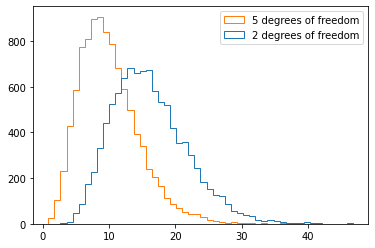

In [18]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')

In [20]:
da=pd.read_csv('Happiness_index.csv')
da.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [22]:
rich=da[da["avg_income"]>=np.mean(da["avg_income"])]
poor=da[da["avg_income"]<np.mean(da["avg_income"])]

In [23]:
poor.mean()

adjusted_satisfaction      43.222222
avg_satisfaction            5.361111
std_satisfaction            2.213611
avg_income               2513.409079
median_income            1817.555581
income_inequality          40.690612
happyScore                  4.843792
GDP                         0.629564
dtype: float64

In [24]:
rich.mean()

adjusted_satisfaction       58.897436
avg_satisfaction             7.000000
std_satisfaction             1.960256
avg_income               13696.921885
median_income            11404.681715
income_inequality           34.221854
happyScore                   6.489205
GDP                          1.233932
dtype: float64

In [26]:
from scipy import stats
stats.ttest_ind?
#info about t-tests

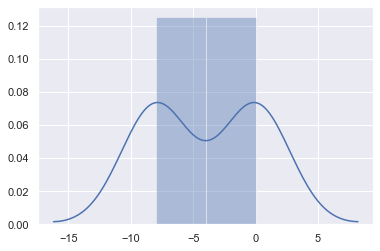

In [30]:
s=stats.ttest_ind(poor['adjusted_satisfaction'], rich['adjusted_satisfaction'])
import seaborn as sns; sns.set() 
sns.distplot(s)

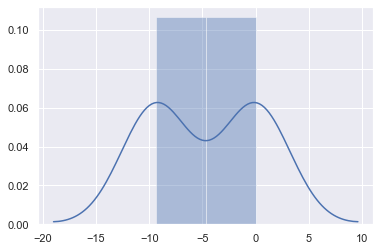

In [31]:
s=stats.ttest_ind(poor['happyScore'], rich['happyScore'])
sns.distplot(s)